# Guided example and challenge

In [44]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Dataset

This dataset came from the Thinkful Challenge in Boosted Models it is based on a European Social Survey

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## Course content

In [4]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [5]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [6]:
# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


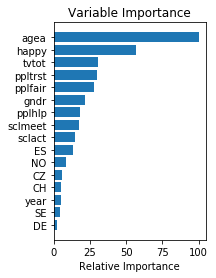

In [7]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

This is where the course content stops

In [8]:
# before I started changing things, I wanted to see the accuracy of their model and their model was horrible!
cross_val_score(clf, X_test, y_test, cv=5)

array([ 0.62576687,  0.09202454,  0.04907975,  0.11656442,  0.39263804])

## Explore the data

In [9]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [10]:
# This shows how many features I have in the dataset
df.shape[1]

13

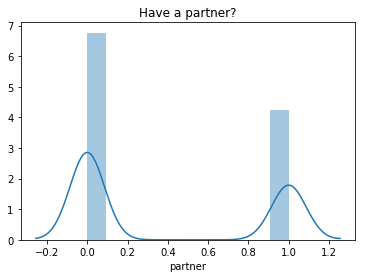

In [11]:
# 1 means they have a partner 0 means they do not.
sns.distplot(y)
plt.title('Have a partner?')
plt.show()

This is a slight imbalance between having a partner and not, there were a little less than twice as many people without partners. 

### Plots on the most important features

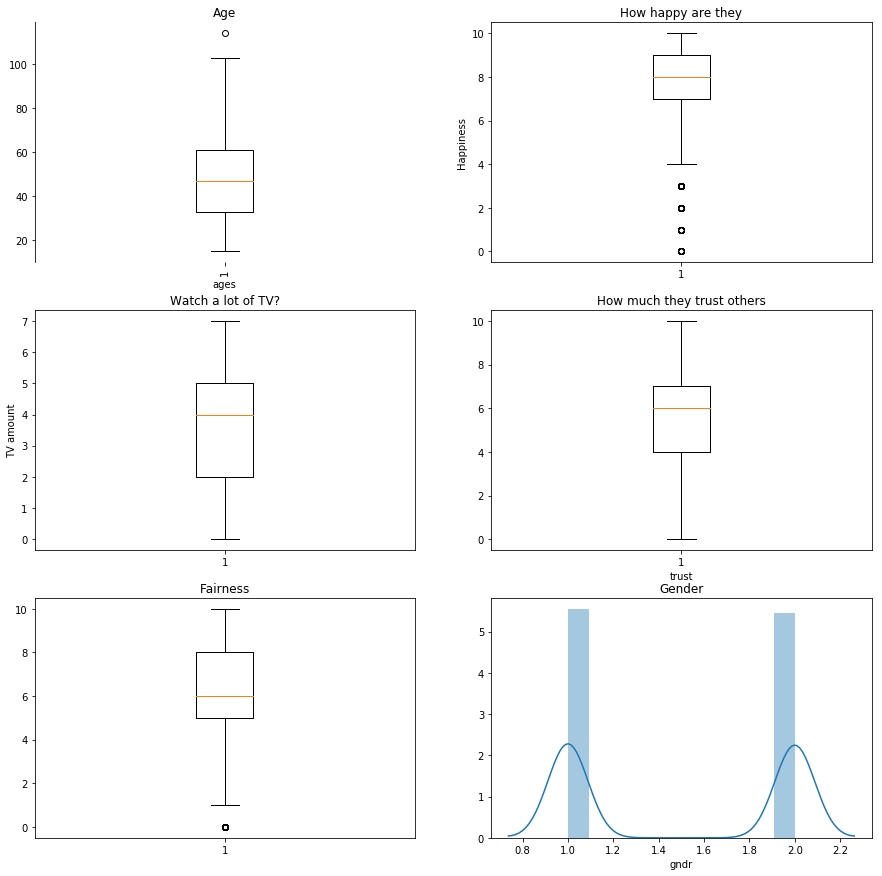

In [12]:
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
plt.boxplot(df['agea'])
plt.title('Age')
plt.xlabel("ages")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 2)
plt.boxplot(df['happy'])
plt.title('How happy are they')
plt.ylabel("Happiness")

plt.subplot(3, 2, 3)
plt.boxplot(df['tvtot'])
plt.title('Watch a lot of TV?')
plt.ylabel("TV amount")

plt.subplot(3, 2, 4)
plt.boxplot(df['ppltrst'])
plt.title('How much they trust others')
plt.xlabel("trust")

plt.subplot(3, 2, 5)
plt.boxplot(df['pplfair'])
plt.title("Fairness")

plt.subplot(3, 2, 6)
sns.distplot(df['gndr'])
plt.title("Gender")

plt.show()

I was actually surprised to see that gender was very close to being 50-50. I was expecting to see more variation with their being less couples than single individuals. Another thing that was surprising to me was the median age of this group was above 40, nearly 50 years old. I would have thought a group in that age range would favor being in a couple than not, shows what I know. 

## PCA

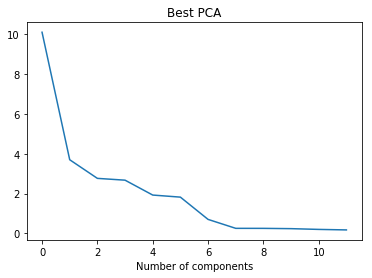

In [16]:
# Finding the best PCA component amount for the job
pca_cnty = PCA(n_components=X.shape[1])
pca_cnty_transform = pca_cnty.fit(X)
plt.plot(pca_cnty_transform.explained_variance_[1:13])
plt.title("Best PCA")
plt.xlabel("Number of components")
plt.show()

I chose 4 components

In [17]:
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)
clf.fit(X_pca, y);

## Fitting model: Estimators, Depth and loss

In [48]:
# formula for finding the most accurate n_estimate for my gradient boosting model. I am concerned with both accurracy and overfitting
def best_nest(model, nest, X_pca, y, loss):
    results = pd.DataFrame(columns=["n_est", "score_mean", "overfitting_range"])
    for i in range(10, nest,10):
        model = ensemble.GradientBoostingClassifier(n_estimators = i, max_depth = 2, loss = loss)
        score = cross_val_score(model, X_pca, y, cv=5)
        results = pd.concat([results, pd.DataFrame({"n_est" :[i], "score_mean" : [np.mean(score)], "overfitting_range" : [max(score) - min(score)]})])
    return results  

In [22]:
# stores all the results into a list, so we can come back to the results later if we wanted 
best_nest_df = best_nest(clf, 600, X_pca, y, 'deviance')

#### tables for best n_estimators

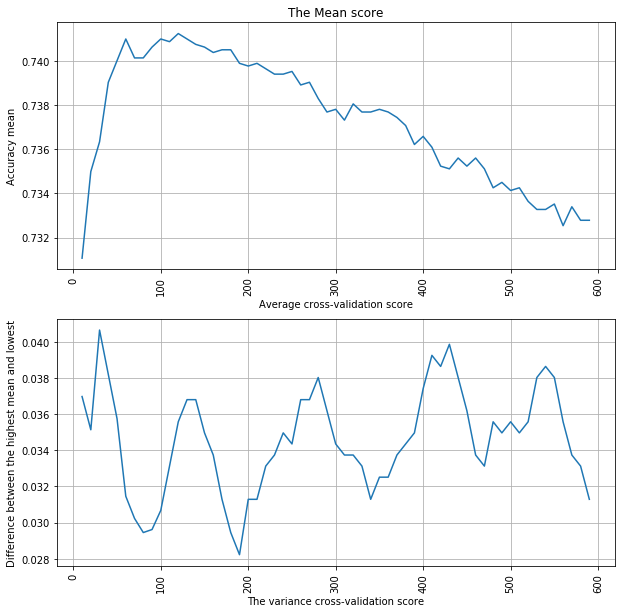

In [39]:
# These two plots are to visualize the average scores and how much overfitting happened for every n-estimator tested.
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(best_nest_df["n_est"], best_nest_df["score_mean"])
plt.title("The Mean score")
plt.xlabel("Number of N-estimators")
plt.xlabel("Average cross-validation score")
plt.xticks(rotation = 90)
plt.ylabel("Accuracy mean")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(best_nest_df["n_est"], best_nest_df["overfitting_range"])
plt.xlabel("Number of N-estimators")
plt.xticks(rotation = 90)
plt.ylabel("Difference between the highest mean and lowest")
plt.grid(True)
plt.show()

These two graphs were extremely helpful in making my decision on the the N_estimators for my model. The best accuracy was seen at 120 n-estimators but the least amount of overfitting happened at 190 estimators. After 190 n-estimators the model just degrades. I am choosing 190 n_estimators because the accuracy difference is slight and I want the model the best more consistant, even if is it just a slight difference.

In [55]:
#Not much different from the previous formula, except this one is to hone on on the best depth using the N-estimators we chose earlier
def best_dep(dep, n_estimators, X_pca, y, loss):
    dep_results = pd.DataFrame(columns=["depth", "score_mean", "overfitting_range"])
    for i in range(1, dep, 1):
        clf = ensemble.GradientBoostingClassifier(n_estimators = n_estimators, max_depth = i, loss = loss)
        score = cross_val_score(clf, X_pca, y, cv=5)
        dep_results = pd.concat([dep_results, pd.DataFrame({"depth" :[i], "score_mean" : [np.mean(score)], "overfitting_range" : [max(score) - min(score)]})])
    return dep_results

In [42]:
# again we are storing these results into one a list 
best_depth_df = best_dep(50, 190, X_pca, y, 'deviance')

#### tables for best depth

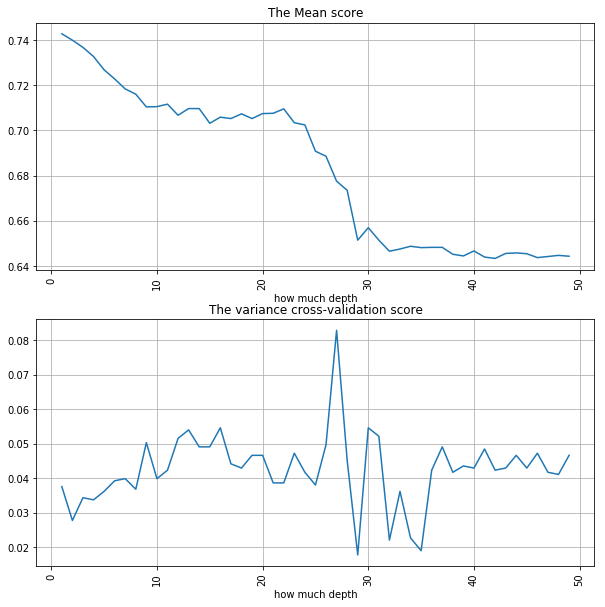

In [51]:
# These tables will help me find the optimal to use
plt.figure(figsize=(10,10))
plt.title("What is the best depth for my model?")
plt.subplot(2,1,1)
plt.plot(best_depth_df["depth"], best_depth_df["score_mean"])
plt.title("The Mean score")
plt.xlabel("how much depth")
plt.xticks(rotation = 90)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(best_depth_df["depth"], best_depth_df["overfitting_range"])
plt.xlabel("how much depth")
plt.title("The variance cross-validation score")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

In [45]:
# Here I am comparing two types of loss and seeing which was the better performer.
clf = ensemble.GradientBoostingClassifier(n_estimators = 190, max_depth =2, loss = 'exponential')
cross_val_score(clf, X_pca, y, cv=5)

array([ 0.75766871,  0.72760736,  0.75521472,  0.72928177,  0.73710074])

In [46]:
clf1 = ensemble.GradientBoostingClassifier(n_estimators = 190, max_depth = 2, loss = 'deviance')
(cross_val_score(clf1, X_pca, y, cv=5))

array([ 0.75521472,  0.72699387,  0.75276074,  0.72744015,  0.73710074])

Exponential ended up being the better performer, but the difference was not a huge difference. It made me want to try to run the formula again with exponential to see if the accuracy can get even better.

### Confusion Matrix

In [47]:
# Here is a confusion matrix to get a better idea of the model performance
y_pred = clf.fit(X_pca, y).predict(X_pca)
confusion_matrix(y, y_pred)

array([[4686,  327],
       [1659, 1475]], dtype=int64)

The confusion matrix shows me that my model is performing better at picking out positives (single people) and type I errors than the negatives (couples) and type II errors. My model misidentified 327 people as single, however they were not. Worse, it misidentified 1659 as not single yet they were.

### Trying to get a better fit with exponential

In [50]:
# same formula but with exponential loss
best_nest_df = best_nest(clf, 600, X_pca, y, 'exponential' )

#### Tables for the new model with 150 n_estimators

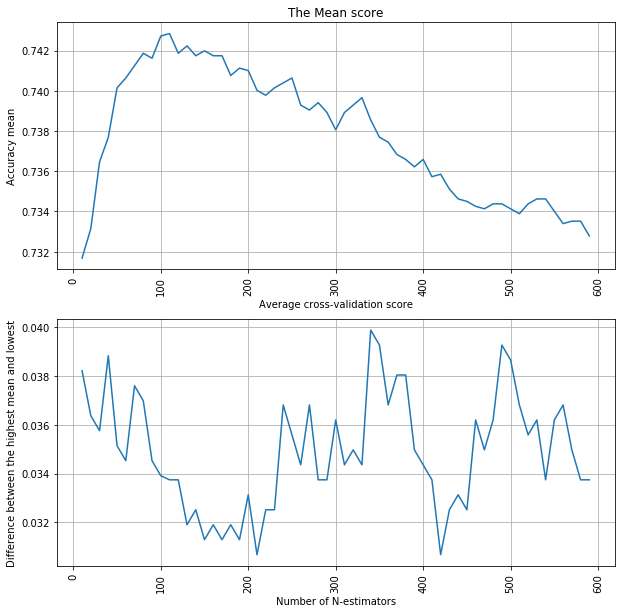

In [53]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(best_nest_df["n_est"], best_nest_df["score_mean"])
plt.title("The Mean score")
plt.xlabel("Number of N-estimators")
plt.xlabel("Average cross-validation score")
plt.xticks(rotation = 90)
plt.ylabel("Accuracy mean")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(best_nest_df["n_est"], best_nest_df["overfitting_range"])
plt.xlabel("Number of N-estimators")
plt.xticks(rotation = 90)
plt.ylabel("Difference between the highest mean and lowest")
plt.grid(True)
plt.show()

With exponential, my accuracy drops after 110 n_estimators but the least amount of overfitting happens at 210 n_estimators. There is a .2% accuracy difference between the two marks. The variance difference is around .3%, I will use a compromise between the two 150 n-estimators, this pick is very close to the highest accuracy and close the lowest overfitting as well.

In [57]:
best_depth_df = best_dep(50, 150, X_pca, y, 'exponential')

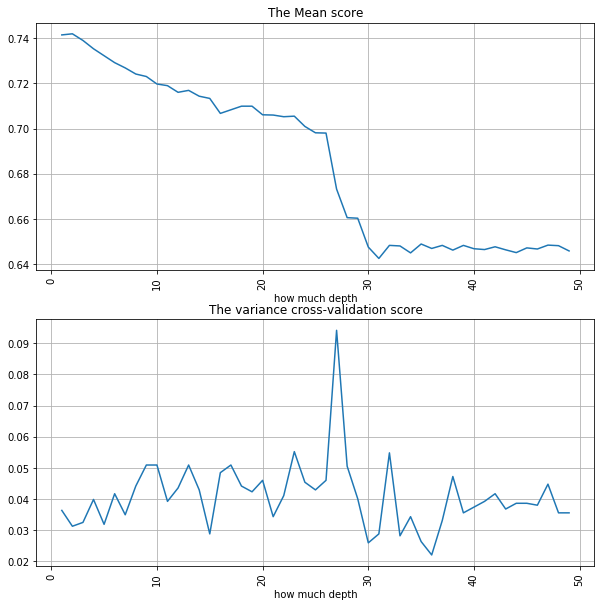

In [58]:
plt.figure(figsize=(10,10))
plt.title("What is the best depth for my model?")
plt.subplot(2,1,1)
plt.plot(best_depth_df["depth"], best_depth_df["score_mean"])
plt.title("The Mean score")
plt.xlabel("how much depth")
plt.xticks(rotation = 90)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(best_depth_df["depth"], best_depth_df["overfitting_range"])
plt.xlabel("how much depth")
plt.title("The variance cross-validation score")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

The accuracy drops sharply after 2 depth, the small difference in overfitting from 2 to 14 or to 36 does not justify the accuracy sacrifice we would have from that change. After looking at both tables the decision was pretty simple to make.

## The final numbers with exponential loss

In [63]:
clf = ensemble.GradientBoostingClassifier(n_estimators = 150, max_depth =2, loss = 'exponential')
cross_val_score(clf, X_pca, y, cv=5)

array([ 0.75766871,  0.72638037,  0.75705521,  0.73112339,  0.73771499])

Here are the first exponential scores 0.75521472,  0.72699387,  0.75276074,  0.72744015,  0.73710074. These accuracies show the model is slightly more accurate than it was.

In [64]:
y_pred = clf.fit(X_pca, y).predict(X_pca)
confusion_matrix(y, y_pred)

array([[4681,  332],
       [1671, 1463]], dtype=int64)

Here is the first exponential confusion matrix. 
([[4686,  327],
  [1659, 1475]] 

After the big change there is only a slight difference in accuracy, one thing to note it that the confusion matrix is showing this model is worse than the first and the cross_val_score shows better than the first. I believe this shows just how little of a difference there was between the two models. With such a small difference, I will prefer the model that has the least amount of overfitting, which is the second one.

## Conclusion

We tried various n_estimators and instead of getting better results with more n_estimators it turned out the sweet spot was between 110-210 with our better loss performer being exponential. I chose 140 because it was the closest between to both the accuracy and the lowest overfitting. Having 2 depth ended up being the best performer in this model. I ended up making two models using exponential loss that both were consistant at a 72.6%-75.7%. These models were so close that one ended up fitting the whole dataset better and the other ended up scoring better when it comes to overfitting. Choosing the model with 140 n-estimators makes the most sense to me because it was my better overfitting model. We don't really need a model that is most accurate when it comes to data we already have. 